In [0]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# **Изучение динамики роста числа обусловленности случайной матрицы от ее порядка**

Для начала создадим функцию, вычисляющую манхеттенское число обусловленности матрицы

In [0]:
def cond(A):
    return linalg.norm(A, 1)*linalg.norm(linalg.inv(A), 1)

Построим график зависимости числа обусловленности от порядка матрицы

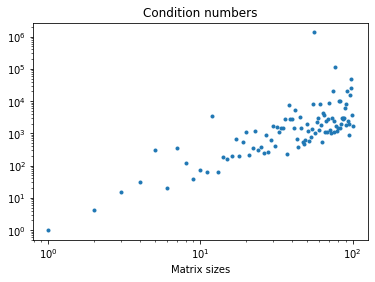

In [58]:
n_vector = np.arange(1, 101)
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.loglog(n_vector,cond_array,'.')
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
pass